In [1]:
import os, sys
sys.path.insert(1, os.path.abspath('..'))

from eustats import *

In [17]:
# Create a dictionary with EU NUTS2 regions
regions = {}
for item in countries.values():
    regions.update(codes[item])

In [63]:
# Get regional GDP per capita

def get_gdp_capita_region():
    params = {'unit': 'EUR_HAB', 'time': 2020,
              'geo': list(regions.keys())}
    df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df['time'] = pd.to_datetime(df['time'])
    #df['year'] = df['time'].dt.year
    #df.set_index(pd.DatetimeIndex(df['time']), inplace=True)  
    df.set_index('region_name', inplace=True) 
    df.rename(columns = {'values': 'GDP per Capita'}, inplace = True)
    df = df[['GDP per Capita']]
    
    return df


In [72]:
def get_unemployment_region():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2021,
              'age': 'Y15-74', 'isced11': 'TOTAL'} 
    df = client.get_dataset('lfst_r_lfu3rt', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Unemployment %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Unemployment %']]
    
    return df


In [76]:
df = get_gdp_capita_region().join(get_unemployment_region())

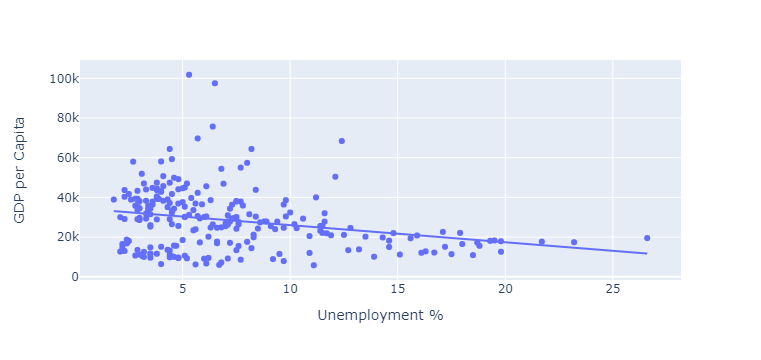

In [95]:
df.plot(kind = 'scatter', y = 'GDP per Capita', x = 'Unemployment %',
        backend = 'plotly', trendline = 'ols')